In [53]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support
import joblib

In [54]:
data = pd.read_csv('milknew.csv')

In [55]:
data.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [56]:
data.shape

(1059, 8)

In [57]:
mean = np.mean(data['pH'])
mean
sd_pH =np.std(data['pH'])
sd_pH

1.3990179626145536

In [58]:
temp_mean = np.mean(data['Colour'])
print(temp_mean)
temp_std = np.std(data['Colour'])
print(temp_std)

251.84041548630785
4.305390061961128


In [59]:
    


data.keys()

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [61]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [62]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [63]:
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [64]:
data['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

In [65]:
low = data[data.Grade == 'low']
medium = data[data.Grade == 'medium']
high = data[data.Grade == 'high']
grade_prcentence = []
grade_prcentence.append((len(low)/len(data))*100)
grade_prcentence.append((len(medium)/len(data))*100)
grade_prcentence.append((len(high)/len(data))*100)
grade_label = ['low','medium','high']

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19144\1011333596.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn-dark')


([<matplotlib.patches.Wedge at 0x22c1355d9d0>,
 [Text(0.32311683962794846, 1.0514730181744307, 'low'),
  Text(-0.9582871193329785, -0.5400794357504293, 'medium'),
  Text(0.7977433271068087, -0.7573675356500035, 'high')])

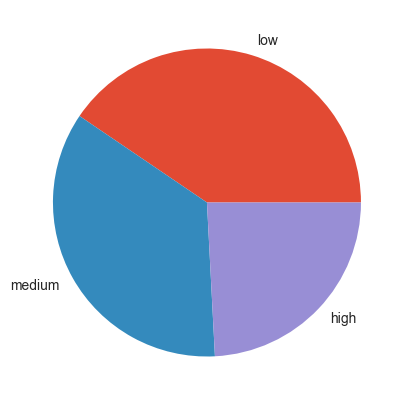

In [66]:
style.use('seaborn-dark')
plt.figure(figsize=(5,5))
plt.pie(grade_prcentence, labels=grade_label)

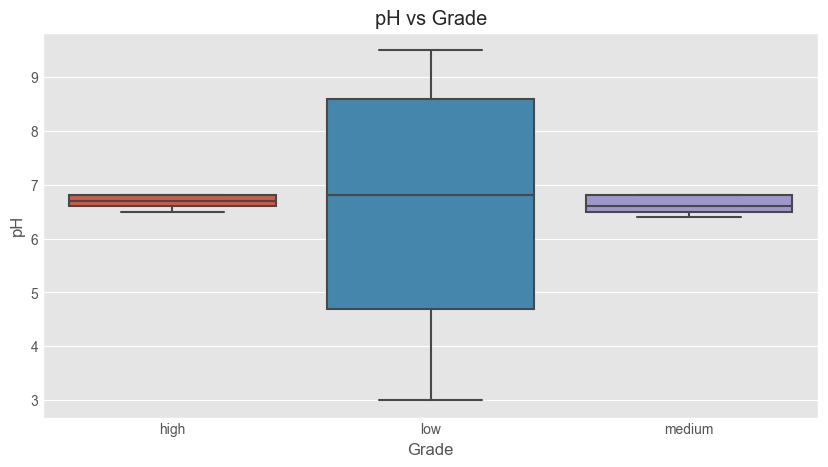

In [67]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="pH")
plt.title('pH vs Grade')
plt.xlabel('Grade')
plt.ylabel('pH')
plt.show()

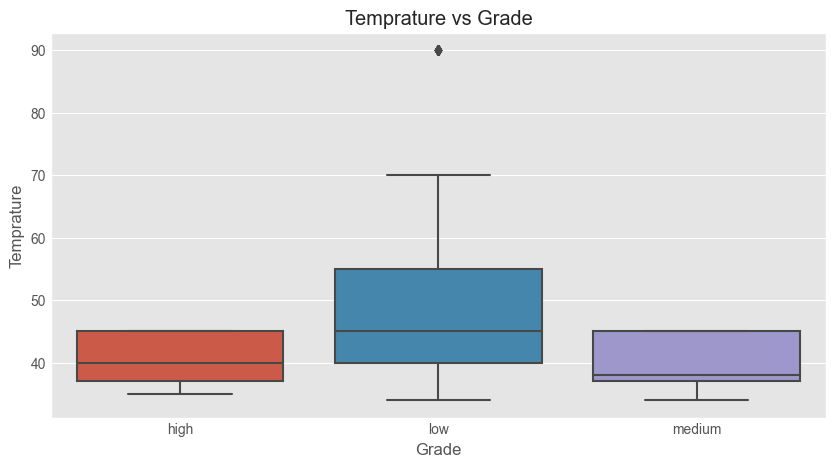

In [68]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="Temprature")
plt.title('Temprature vs Grade')
plt.xlabel('Grade')
plt.ylabel('Temprature')
plt.show()

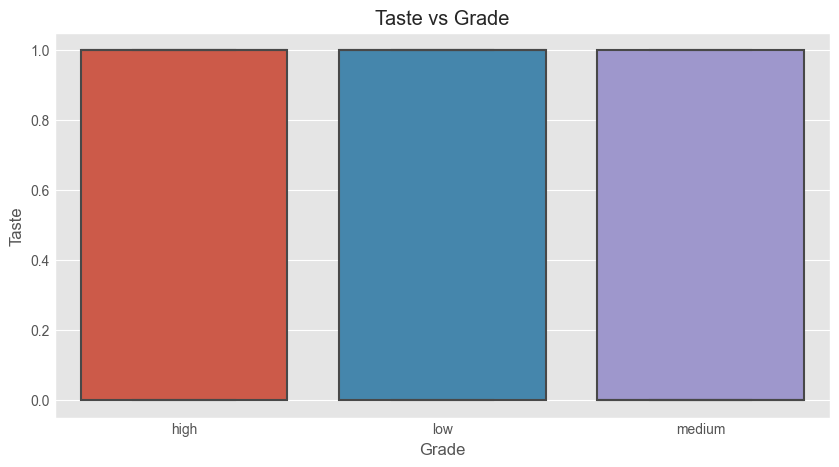

In [69]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="Taste")
plt.title('Taste vs Grade')
plt.xlabel('Grade')
plt.ylabel('Taste')
plt.show()

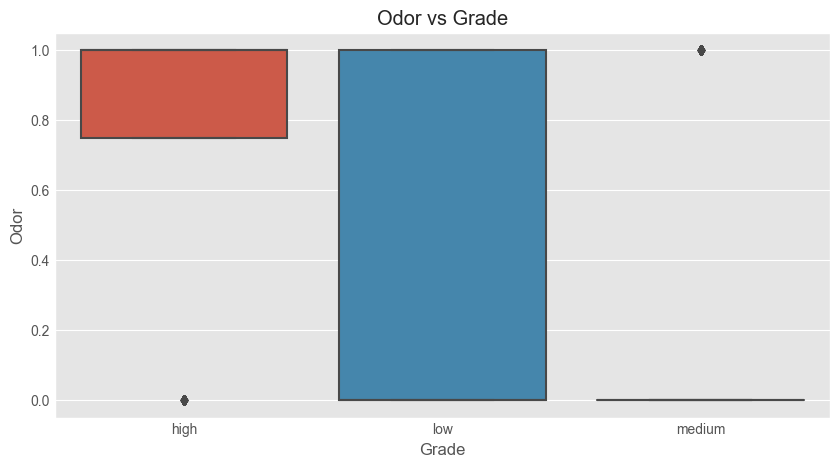

In [70]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="Odor")
plt.title('Odor vs Grade')
plt.xlabel('Grade')
plt.ylabel('Odor')
plt.show()

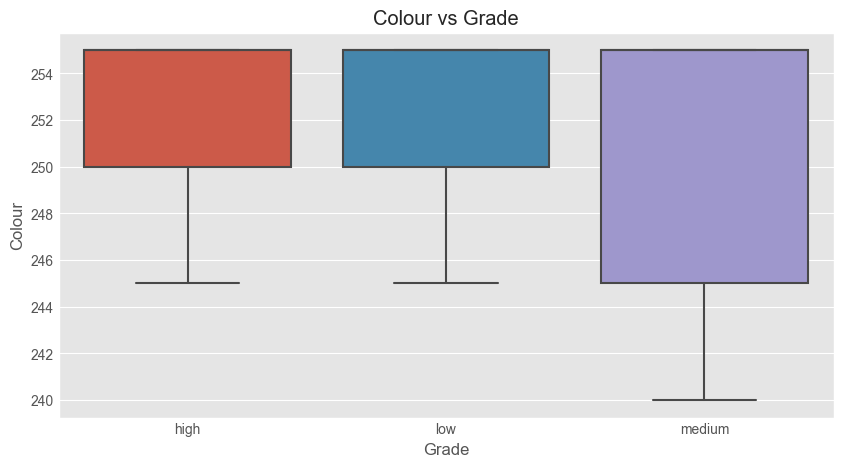

In [71]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="Colour")
plt.title('Colour vs Grade')
plt.xlabel('Grade')
plt.ylabel('Colour')
plt.show()

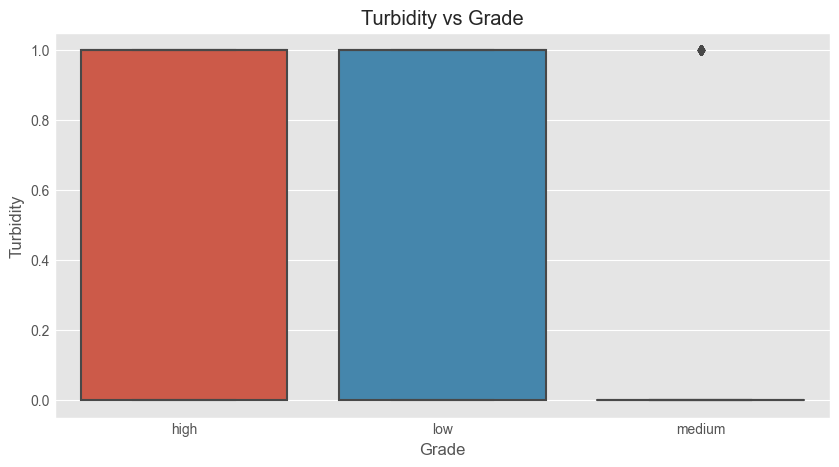

In [72]:
style.use('ggplot')
plt.figure(figsize=(10,5))
sns.boxplot(data=data, x="Grade", y="Turbidity")
plt.title('Turbidity vs Grade')
plt.xlabel('Grade')
plt.ylabel('Turbidity')
plt.show()

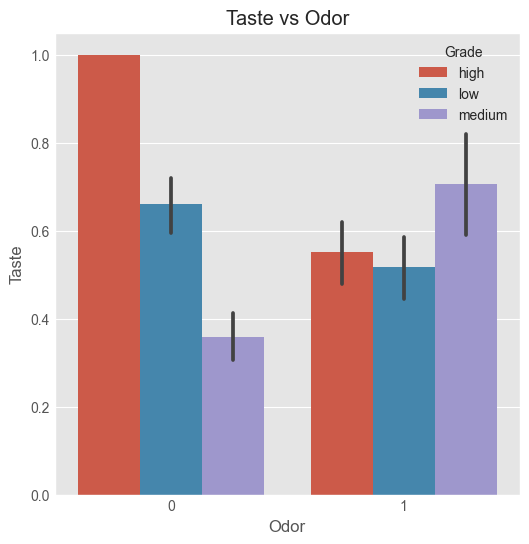

In [73]:
plt.figure(figsize=(6,6))
sns.barplot(x='Odor',y='Taste',hue='Grade',data=data)
plt.title('Taste vs Odor')
plt.show()

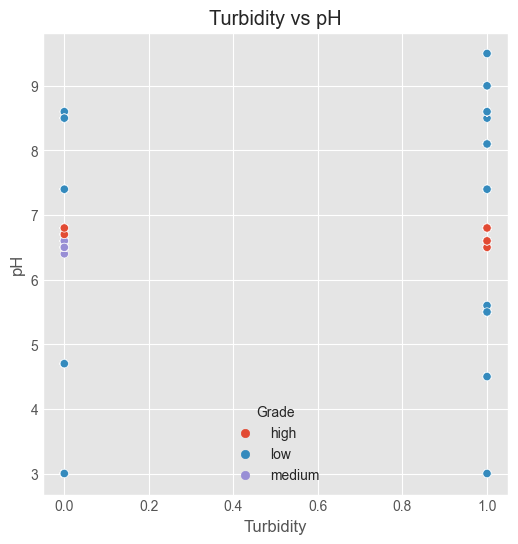

In [74]:
 plt.figure(figsize=(6,6))
sns.scatterplot(x='Turbidity',y='pH',hue='Grade',data=data)
plt.title('Turbidity vs pH')
plt.show()

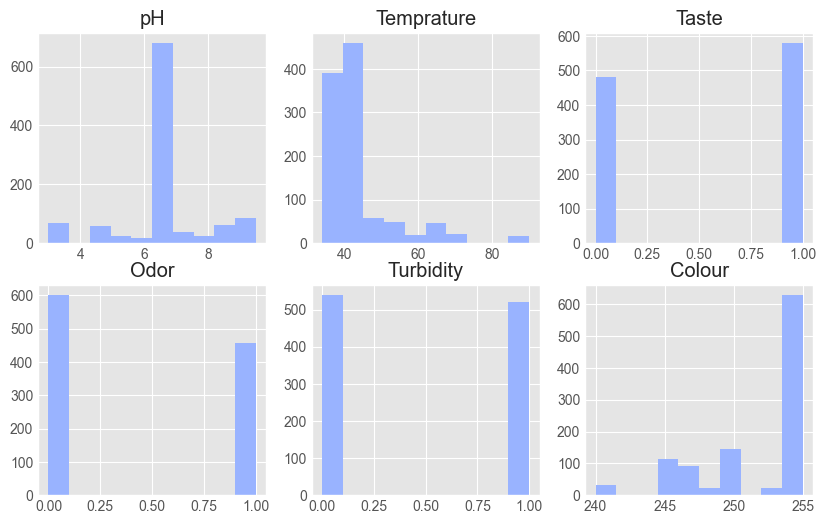

In [75]:
column=['pH','Temprature','Taste','Odor','Turbidity','Colour']
plt.figure(figsize=(10,6))
for i,category in enumerate(column):
    plt.subplot(2,3,i+1)
    plt.hist(data[category],color='#99b3ff')
    plt.title(category)
plt.show()


In [76]:
data['Grade'].unique()

array(['high', 'low', 'medium'], dtype=object)

In [77]:
label_encoder = preprocessing.LabelEncoder()
data['Grade']= label_encoder.fit_transform(data['Grade'])
data['Grade'].unique()

array([0, 1, 2])

In [78]:
X = data.drop(['Grade'],axis=1)
y = data['Grade']

<AxesSubplot: >

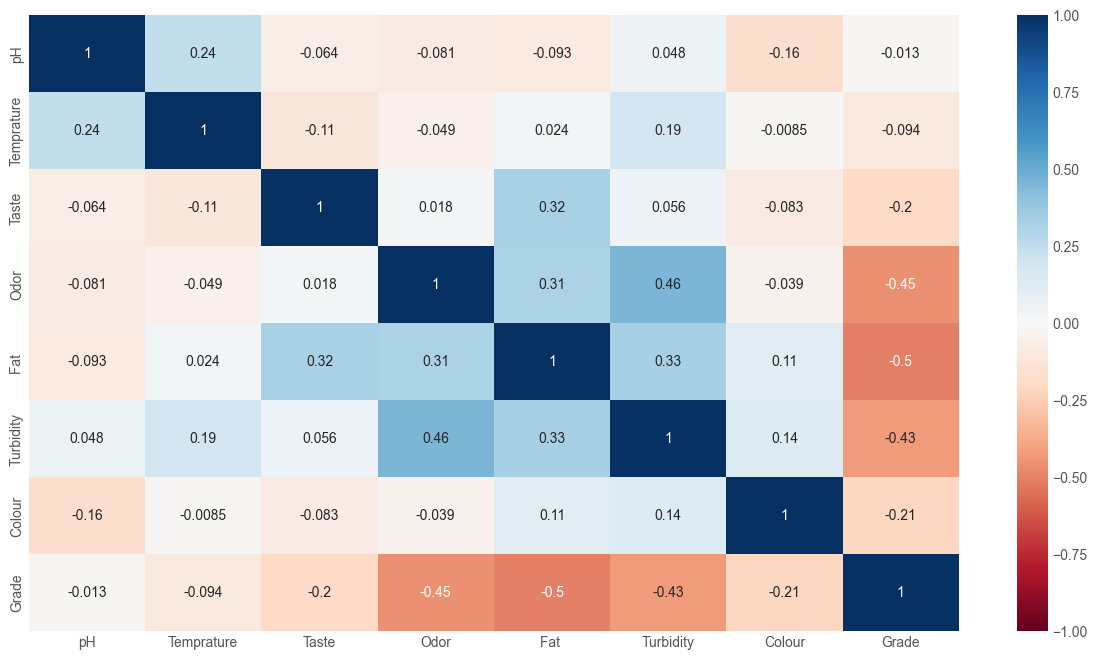

In [79]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax= 1 , annot=True)

In [80]:
X.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255


In [81]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
X

array([[0.55384615, 0.01785714, 1.        , ..., 1.        , 0.        ,
        0.93333333],
       [0.55384615, 0.03571429, 0.        , ..., 0.        , 1.        ,
        0.86666667],
       [0.84615385, 0.64285714, 1.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.10714286, 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.58461538, 0.16071429, 1.        , ..., 1.        , 0.        ,
        0.66666667],
       [0.86153846, 0.375     , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [84]:
def draw_confusion_matrix(y_test,test_predict):
    confusion_matrix = metrics.confusion_matrix(y_test, test_predict)

    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

    cm_display.plot()
    plt.show()

In [85]:
y_test_high = (y_test==0)
y_train_high = (y_train==0)

In [86]:
test = X[4]
test

array([0.55384615, 0.05357143, 0.        , 0.        , 0.        ,
       0.        , 1.        ])

## DECISION TREE

In [87]:
# model=DecisionTreeClassifier()


In [88]:
# search_space_dtc = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth': [4,5,6,7,8,9]
# }

In [89]:
# gs = GridSearchCV(estimator=model,
#                   param_grid=search_space_dtc,
#                   scoring = ['r2','neg_root_mean_squared_error'],
#                   refit = 'r2',
#                   cv=5,
                
#                  )
# gs.fit(X_train,y_train_high)

In [90]:
# gs.best_estimator_

In [91]:
#joblib.dump(gs.best_estimator_, "decision_model.joblib.dat")

In [92]:
loaded_model = joblib.load("decision_model.joblib.dat")

In [93]:
X_train_prediction = loaded_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_high)
print('Accuracy on Training data : ', training_data_accuracy)
    
X_test_prediction = loaded_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test_high)
print('Accuracy score on Test Data : ', test_data_accuracy)


Accuracy on Training data :  1.0
Accuracy score on Test Data :  1.0


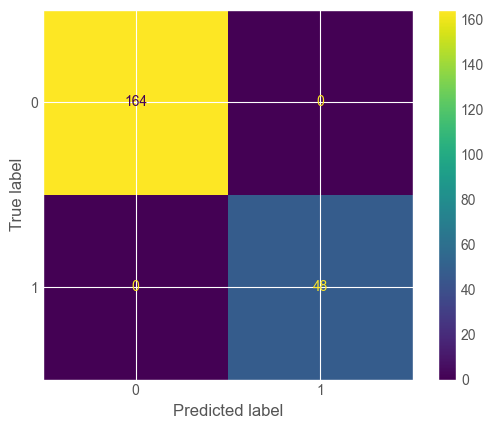

In [94]:
draw_confusion_matrix(y_test_high,X_test_prediction)

In [95]:
precision_recall_fscore_support(y_test_high, X_test_prediction, average='macro')

(1.0, 1.0, 1.0, None)

In [96]:
loaded_model.predict([test])

array([0.])

In [97]:
import pickle

In [98]:
filename = 'milktest.sav'
pickle.dump(loaded_model, open(filename, 'wb'))

In [99]:
import numpy as np
input_data = (4,9,0,0,0,1,134)
id_np_array = np.asarray(input_data)
id_reshaped = id_np_array.reshape(1,-1)

prediction= loaded_model.predict(id_reshaped)
print(prediction)

if(prediction[0]== 0):
     print("low")
else:
     print("high")

[0.]
low


## Random Forest

In [100]:
r_model=RandomForestClassifier() 

In [101]:
search_space_rfc = {
    'n_estimators' : [100,200,300,400],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2,3,4,5,6],
}

In [102]:
gs_rfc = GridSearchCV(estimator=r_model,
                  param_grid=search_space_rfc,
                  scoring = ['r2','neg_root_mean_squared_error'],
                  refit = 'r2',
                  cv=5,
                 )
gs_rfc.fit(X_train,y_train_high)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [100, 200, 300, 400]},
             refit='r2', scoring=['r2', 'neg_root_mean_squared_error'])

In [103]:
gs_rfc.best_estimator_

RandomForestClassifier(max_depth=6)

In [104]:
X_train_prediction = gs_rfc.best_estimator_.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_high)
print('Accuracy on Training data : ', training_data_accuracy)
    
X_test_prediction = gs_rfc.best_estimator_.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test_high)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy on Training data :  0.9976387249114522
Accuracy score on Test Data :  0.9858490566037735


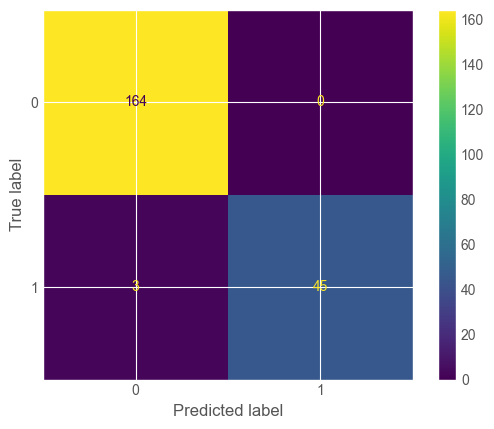

In [105]:
draw_confusion_matrix(y_test_high,X_test_prediction)

In [106]:
precision_recall_fscore_support(y_test_high, X_test_prediction, average='macro')

(0.9910179640718563, 0.96875, 0.9793392456875548, None)